<a href="https://colab.research.google.com/github/jamesson-dev/Analise_de_Credito/blob/main/Modelo_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo_Credito


In [ ]:
# #import the dataset
# dataset = pd.read_excel('sample_data/Folds5x2_pp.xlsx')

In [ ]:
# X = dataset.iloc[:, :-1].values
# Y = dataset.iloc[:, -1].values


In [ ]:
pip install lifelines

In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Carregar dados do Excel
credito = pd.read_excel("/content/sample_data/Crédito.xlsx")

In [31]:
print(credito.columns)


Index(['Data Originação', 'Cliente', 'Status', 'Score', 'Data default',
       'Data Corte', 'Data', 'Time', 'Rating', 'Rating_b', 'Rating_c'],
      dtype='object')


In [32]:
print(credito)

    Data Originação Cliente  Status       Score            Data default  \
0        2012-01-01      A1       0 -224.254433                     NaT   
1        2012-01-01      A2       0   76.782279                     NaT   
2        2012-01-01      A3       0 -272.467118                     NaT   
3        2012-01-01      A4       0  117.688571                     NaT   
4        2012-01-01      A5       0  183.419335                     NaT   
..              ...     ...     ...         ...                     ...   
160      2012-03-01    A161       0  467.299782                     NaT   
161      2012-03-01    A162       0   49.907676                     NaT   
162      2012-03-01    A163       0 -201.797136                     NaT   
163      2012-03-01    A164       1    7.836374 2012-11-03 01:49:53.427   
164      2012-03-01    A165       1 -500.000000 2012-11-08 16:24:32.931   

    Data Corte                    Data        Time Rating  Rating_b  Rating_c  
0   2013-01-01 2013

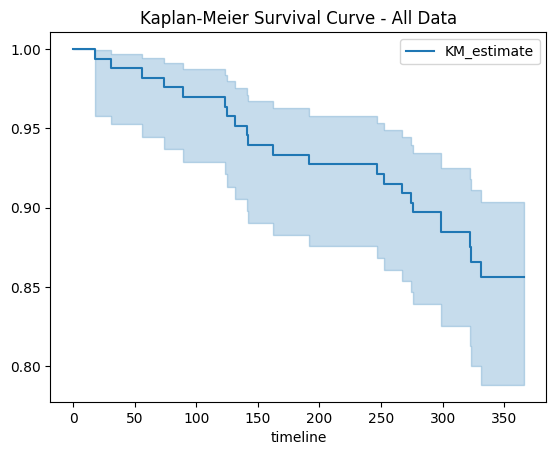

In [33]:
# Ajustar e sumarizar o modelo de Kaplan-Meier para todos os dados
kmf = KaplanMeierFitter()
kmf.fit(durations=credito['Time'], event_observed=credito['Status'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve - All Data')
plt.show()

In [34]:
# Criar uma variável dummy baseada na pontuação
credito['dummy_score'] = (credito['Score'] > 100).astype(int)

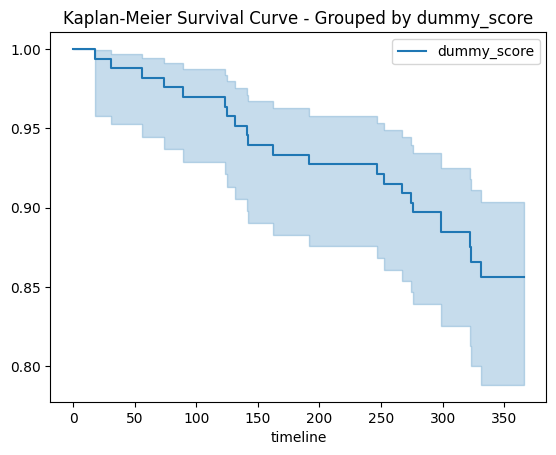

In [35]:
# Ajustar e sumarizar o modelo de Kaplan-Meier para os dados agrupados por 'dummy_score'

kmf_grouped = KaplanMeierFitter()
kmf_grouped.fit(durations=credito['Time'], event_observed=credito['Status'],
                label='dummy_score')
kmf_grouped.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve - Grouped by dummy_score')
plt.show()

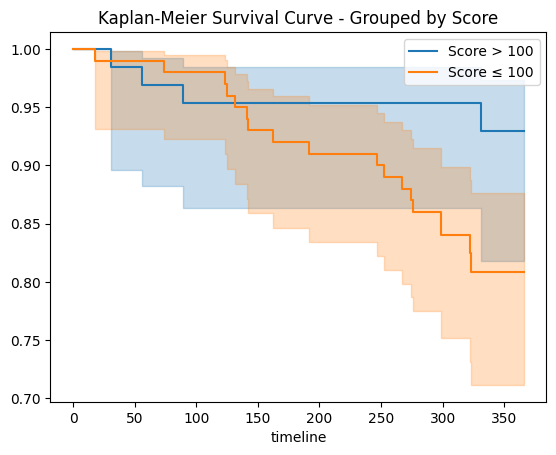

In [36]:
# Supondo que 'credito' seja um DataFrame com as colunas 'Score', 'Time' e 'Status'
credito['dummy_score'] = (credito['Score'] > 100).astype(int)

# Separar os dados em dois grupos
group_above_100 = credito[credito['dummy_score'] == 1]
group_below_or_equal_100 = credito[credito['dummy_score'] == 0]

# Ajustar o modelo de Kaplan-Meier para cada grupo
kmf_above_100 = KaplanMeierFitter()
kmf_below_or_equal_100 = KaplanMeierFitter()

kmf_above_100.fit(durations=group_above_100['Time'], event_observed=group_above_100['Status'], label='Score > 100')
kmf_below_or_equal_100.fit(durations=group_below_or_equal_100['Time'], event_observed=group_below_or_equal_100['Status'], label='Score ≤ 100')

# Plotar as funções de sobrevivência para cada grupo
ax = kmf_above_100.plot_survival_function()
kmf_below_or_equal_100.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve - Grouped by Score')
plt.show()


In [37]:
# Supondo que 'credito' seja um DataFrame com as colunas 'Score', 'Time' e 'Status'
credito['dummy_score'] = (credito['Score'] > 100).astype(int)

# Separar os dados em dois grupos
group_above_100 = credito[credito['dummy_score'] == 1]
group_below_or_equal_100 = credito[credito['dummy_score'] == 0]

# Ajustar o modelo de Kaplan-Meier para cada grupo
kmf_above_100 = KaplanMeierFitter()
kmf_below_or_equal_100 = KaplanMeierFitter()

kmf_above_100.fit(durations=group_above_100['Time'], event_observed=group_above_100['Status'], label='Score > 100')
kmf_below_or_equal_100.fit(durations=group_below_or_equal_100['Time'], event_observed=group_below_or_equal_100['Status'], label='Score ≤ 100')

# Definir os pontos de tempo desejados
timeline = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]

# Obter as estimativas de sobrevivência para cada grupo nos pontos de tempo especificados
survival_above_100_at_timeline = kmf_above_100.predict(timeline)
survival_below_or_equal_100_at_timeline = kmf_below_or_equal_100.predict(timeline)

# Criar um DataFrame com as estimativas
survival_estimates = pd.DataFrame({
    'Time': timeline,
    'Survival Score > 100': survival_above_100_at_timeline,
    'Survival Score ≤ 100': survival_below_or_equal_100_at_timeline
})

# Visualizar a tabela de estimativas
print(survival_estimates)

     Time  Survival Score > 100  Survival Score ≤ 100
30     30              1.000000              0.990000
60     60              0.969231              0.990000
90     90              0.953846              0.980000
120   120              0.953846              0.980000
150   150              0.953846              0.930000
180   180              0.953846              0.920000
210   210              0.953846              0.910000
240   240              0.953846              0.910000
270   270              0.953846              0.880000
300   300              0.953846              0.840000
330   330              0.953846              0.808889
360   360              0.929389              0.808889


In [40]:
# Ajustar o modelo de Cox somente com 'Score' como variável
cph_score = CoxPHFitter()
cph_score.fit(credito, 'Time', event_col='Status', formula = ["Rating_b", "Rating_c"])
cph_score.print_summary(decimals=4)

<lifelines.CoxPHFitter: fitted with 165 total observations, 143 right-censored observations>
             duration col = 'Time'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 165
number of events observed = 22
   partial log-likelihood = -107.4726
         time fit was run = 2024-08-05 18:22:00 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Rating_b  1.1365     3.1157     0.8165          -0.4639           2.7368               0.6288              15.4379
Rating_c  1.2964     3.6562     0.7560          -0.1853           2.7781               0.8309              16.0890

            cmp to      z      p   -log2(p)
covariate                                  
Rating_b    0.0000 1.3918 0.1640     2.6084
Rating_c    0.0000 1.7149 0.0864     3.5333
---
Concordance = 0.6022
Partial AIC = 218.9453
log-likelihood ratio test = 4.0563 on 2 df
-log2(p) of ll-ratio test = 2.9260

In [ ]:
# Ajustar o modelo de Cox para todos os dados e para 'Score'
# cph = CoxPHFitter()
# cph.fit(credito, duration_col='Time', event_col='Status')
# cph.print_summary()

In [ ]:
# # Plotar as estimativas de sobrevivência para o modelo de Cox
# cph.plot()
# plt.title('Cox Proportional Hazards Model - All Data')
# plt.show()

# cph_score.plot()
# plt.title('Cox Proportional Hazards Model - Score')
# plt.show()
